# Cargando Audio de un dataset (IRMAS dataset)
[Link de la data](https://www.upf.edu/web/mtg/irmas)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/Uchile_Sonido/ML"

'00 - Introducción al aprendizaje de máquina'
'01 - Fundamentos matemáticos'
'02 - Introducción a la programación en python'
'03 - Análisis y visualización de datos'
'04 - Modelos clásicos de machine learning: teoría e implementación'
'05 - Introducción a modelos avanzados'
'06 - Proyectos'
 README.md
 Recursos


In [ ]:
!ls "/content/drive/MyDrive/Uchile_Sonido/ML/03 - Análisis y visualización de datos"

archive				       tutorial_python_audio_05.ipynb
audio.wav			       tutorial_python_ciclos_04.ipynb
intro_python_numpy_DLAI_02.ipynb       tutorial_python_estructuras_02.ipynb
intro_sintaxis_python_numpy_01.ipynb   tutorial_python_funciones_03.ipynb
IRMAS-Sample			       tutorial_python_sox_and_ffmpeg_06.ipynb
Loading_Audio_and_Visualization.ipynb  tutorial_python_strings_00.ipynb
tone_wav_440.wav


In [ ]:
%cd "/content/drive/MyDrive/Uchile_Sonido/ML/03 - Análisis y visualización de datos"

/content/drive/MyDrive/Uchile_Sonido/ML/02 - Introducción a la programación en python


### Cargamos los audios

In [ ]:
import os
import typing
from typing import List, Tuple, Dict

In [ ]:
def calling_audios(data_path:str)->List[str]:
    '''
        Cargando los nombres de los audios
    '''
    names = list()
    for dirname, _, filenames in os.walk(data_path):
        for filename in filenames:
            names.append(filename)
    return names

In [ ]:
data_path_train = '/content/drive/MyDrive/Uchile_Sonido/ML/03 - Análisis y visualización de datos/IRMAS-Sample/Training'

In [ ]:
training_names = calling_audios(data_path_train)

In [ ]:
# Audio Numbers
print("Number of total audios: ")
print(len(training_names))

print("Name Example: ")
print(training_names[0])

Number of total audios: 
3
Name Example: 
118__[sax][nod][jaz_blu]1702__3.wav


## Escuchemos un ejemplo

In [ ]:
import IPython.display as ipd
ipd.Audio(data_path_train+'/sax/118__[sax][nod][jaz_blu]1702__3.wav',rate=22050) # load a local WAV file

### Extracción de Características

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
y, sr = librosa.load(data_path_train+'/sax/118__[sax][nod][jaz_blu]1702__3.wav',sr=22050)

## Características espectrales

In [ ]:
# Mel-espectrograma
D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D, sr=sr)

In [ ]:
S

array([[8.5202046e-02, 1.8338427e-01, 1.8832363e-01, ..., 4.1663253e-01,
        5.5812681e-01, 6.7996347e-01],
       [1.2617631e+00, 2.6282263e+00, 1.7836642e+00, ..., 1.5196147e+00,
        5.5696237e-01, 8.8271701e-01],
       [2.1366096e+00, 3.0104222e+00, 2.4284091e+00, ..., 6.4258838e-01,
        9.6199036e-01, 2.4785829e+00],
       ...,
       [1.6377569e-04, 2.3691915e-04, 2.9274740e-04, ..., 8.3264289e-04,
        1.1016537e-03, 1.9091970e-03],
       [8.4500265e-05, 3.3625547e-05, 2.6487603e-05, ..., 1.0660519e-04,
        2.6724755e-04, 1.3940759e-03],
       [8.3371364e-05, 2.0972680e-05, 3.4292688e-07, ..., 1.1647081e-06,
        1.5751191e-04, 1.2386960e-03]], dtype=float32)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

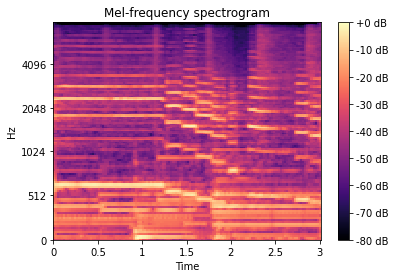

In [ ]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [ ]:
# Centroide del espectrograma
cent = librosa.feature.spectral_centroid(y=y, sr=sr)

In [ ]:
cent

array([[2049.66231559, 2270.81762258, 2595.99706422, 2426.43453772,
        2272.75585734, 2244.86916547, 2291.22022032, 2335.04580855,
        2317.17815767, 2364.67681961, 2351.51915868, 2343.07253982,
        2342.87774907, 2356.36024351, 2366.72934401, 2337.13705324,
        2383.02553572, 2390.48688792, 2259.47692524, 2221.8888494 ,
        2201.45838513, 2206.31876495, 2132.59869824, 2124.66008776,
        2262.49874   , 2545.37555256, 2571.7251097 , 2390.22587501,
        2325.62450444, 2334.75558599, 2351.54611182, 2338.40567507,
        2326.47356697, 2374.29316675, 2385.48600081, 2357.93743262,
        2281.02098357, 2231.93518665, 2216.04561261, 1812.25100366,
        1513.08876019, 1479.30822078, 1611.41203015, 1693.05163563,
        1689.14225159, 1806.62014337, 1938.1616533 , 2042.17157601,
        2333.92811851, 2723.63137046, 2545.05913135, 2121.00900954,
        1960.91109473, 1889.76298163, 1694.99793727, 1916.00741527,
        1911.38127042, 1888.50563883, 1963.17340

[Text(0.5, 1.0, 'log Power spectrogram')]

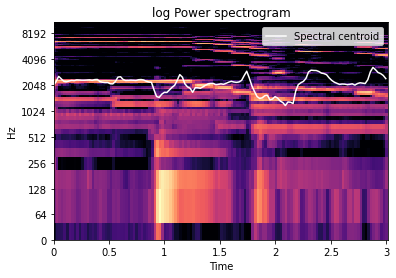

In [ ]:
times = librosa.times_like(cent)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

## Características Temporales

Zero Crossing Rate

Número de veces que la señal cruza el 0.

\begin{equation}
  zcr = \dfrac{1}{T-1}\displaystyle \sum_{t=1}^{T-1} 1 \mathbb{R}_{<0}(s_{t}s_{t-1})
\end{equation}

donde $s$ es la señal, $T$ es el largo de la señal y $1 \mathbb{R}_{<0}$ es una función indicadora. 

In [ ]:
zero_crossing_rate = librosa.feature.zero_crossing_rate(y)

In [ ]:
zero_crossing_rate.shape

(1, 130)

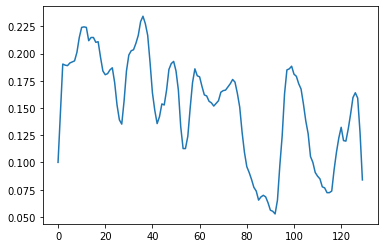

In [ ]:
plt.plot(zero_crossing_rate[0])

### Energía 

$$ \sum_n \left| x(n) \right|^2 $$


### Energía RMSE

$$ \sqrt{ \frac{1}{N} \sum_n \left| x(n) \right|^2 } $$

Programando el cálculo de la energía RMSE

In [ ]:
hop_length = 256  #tamaño de la ventana
frame_length = 512 # cantidad de frames por sumar

In [ ]:
y.shape[0]/256

258.3984375

In [ ]:
energy = list()
for i in range(0,y.shape[0],hop_length):
 energy.append(sum(abs(y[i:i+frame_length]**2)))

In [ ]:
energy = np.array(energy)[0,:]

In [ ]:
energy.shape

(259,)

In [ ]:
rmse = librosa.feature.rms(y, frame_length=frame_length, hop_length=hop_length, center=True)[0,:]

In [ ]:
rmse.shape

(259,)

In [ ]:
energy_rmse = list()
for i in range(0,y.shape[0],hop_length):
 energy_rmse.append(np.sqrt(1/frame_length*sum(abs(y[i:i+frame_length]**2))))

In [ ]:
len(energy_rmse)

259

Transformamos framse a tiempo

In [ ]:
frames = range(len(energy))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

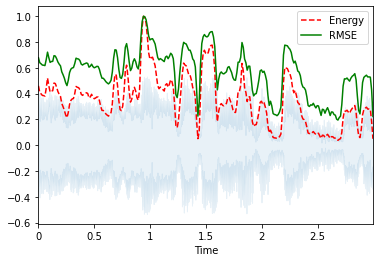

In [ ]:
librosa.display.waveplot(y, sr=sr, alpha=0.1)
plt.plot(t, energy/np.max(energy), 'r--')             # normalizando para visualizar
plt.plot(t[:len(energy_rmse)], energy_rmse/np.max(energy_rmse), color='g') # normalizando para visualizar
plt.legend(('Energy', 'RMSE'))

# ¿Cuál es el propósito de todo esto?

Unir la sección de histograma-distribución con los modelos de Machine Learning

In [ ]:
import pathlib
from pathlib import Path
MyPath = pathlib.Path("/content/drive/MyDrive/Uchile_Sonido/ML/02 - Introducción a la programación en python/archive")

In [ ]:
kick_signals = [
    librosa.load(p)[0] for p in MyPath.glob('kick/Bass Sample *.wav')
]

In [ ]:
len(kick_signals)

40

In [ ]:
kick_signals[0]

array([-1.3289122e-02,  1.1021988e-01,  2.3943087e-01, ...,
        8.3536042e-06,  9.9895142e-06,  2.0069670e-05], dtype=float32)

In [ ]:
snare_signals = [
    librosa.load(p)[0] for p in MyPath.glob('snare/Snare Sample *.wav')
]

In [ ]:
len(snare_signals)

40

In [ ]:
snare_signals[0]

array([-0.00325204, -0.02069873, -0.14443919, ..., -0.0004498 ,
       -0.00042254, -0.00055516], dtype=float32)

Utilicemos un constructor y extractor de características

In [ ]:
help(librosa.feature.zero_crossing_rate)

Help on function zero_crossing_rate in module librosa.feature.spectral:

zero_crossing_rate(y, frame_length=2048, hop_length=512, center=True, **kwargs)
    Compute the zero-crossing rate of an audio time series.
    
    Parameters
    ----------
    y : np.ndarray [shape=(n,)]
        Audio time series
    
    frame_length : int > 0
        Length of the frame over which to compute zero crossing rates
    
    hop_length : int > 0
        Number of samples to advance for each frame
    
    center : bool
        If `True`, frames are centered by padding the edges of ``y``.
        This is similar to the padding in `librosa.stft`,
        but uses edge-value copies instead of reflection.
    
    kwargs : additional keyword arguments
        See `librosa.zero_crossings`
    
        .. note:: By default, the ``pad`` parameter is set to `False`, which
            differs from the default specified by
            `librosa.zero_crossings`.
    
    Returns
    -------
    zcr : np.ndarr

In [ ]:
def extract_features(signal):
  '''
    Construye una representación bidimensional de estas características
  '''
  return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],  #solo elegimos el zero crossing rate en el frame 0 (para efectos del ejemplo)
        librosa.feature.spectral_centroid(signal)[0, 0],   #solo elegimos el centroide del espectro en el frame 0 (para efectos del ejemplo)
    ]

In [ ]:
kick_features = np.array([extract_features(x) for x in kick_signals])
snare_features = np.array([extract_features(x) for x in snare_signals])

In [ ]:
kick_features.shape

(40, 2, 1, 87)

In [ ]:
snare_features.shape

(40, 2)

Vsiualicemos a través de histogramas los valores obtenidos de las características extraídas

Text(0, 0.5, 'Conteo')

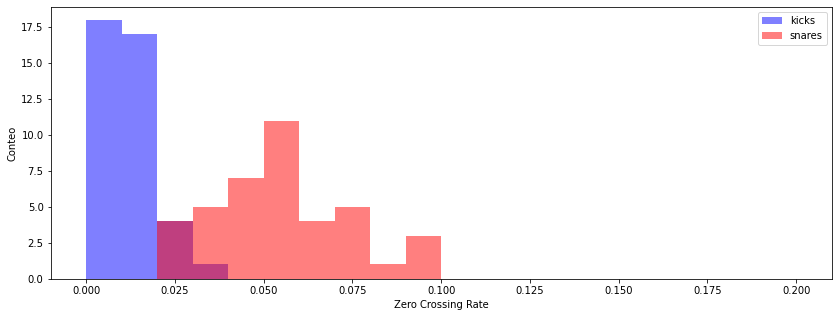

In [ ]:
plt.figure(figsize=(14, 5))
plt.hist(kick_features[:,0], color='b', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(snare_features[:,0], color='r', range=(0, 0.2), alpha=0.5, bins=20)
plt.legend(('kicks', 'snares'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Conteo')

Text(0, 0.5, 'Conteo')

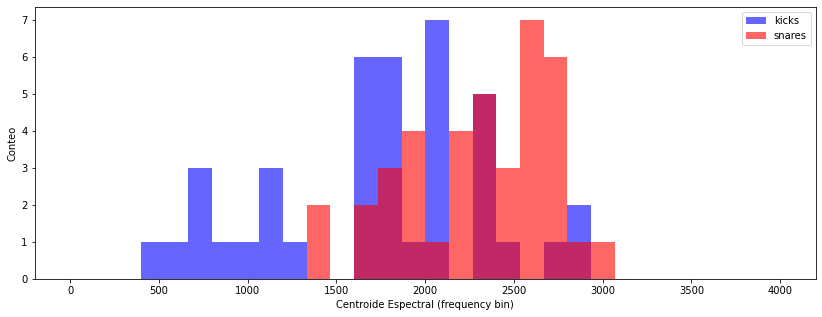

In [ ]:
plt.figure(figsize=(14, 5))
plt.hist(kick_features[:,1], color='b', range=(0, 4000), bins=30, alpha=0.6)
plt.hist(snare_features[:,1], color='r', range=(0, 4000), bins=30, alpha=0.6)
plt.legend(('kicks', 'snares'))
plt.xlabel('Centroide Espectral (frequency bin)')
plt.ylabel('Conteo')

Es evidente que cada una de estas características utilizan diferentes "unidades de medidas" que no se encuentran a una misma escala. Esta discrepancia de unidades puede afectar a los futuros modelos que entrenaremos, puesto que es una información conocida por nosotros y la física y no el modelo. 

Entonces es común normalizar las características extraídas a una escala común. Existen diferentes formas de normalizar! Veamos una forma sencilla de hacer esto: 

In [ ]:
feature_table = np.vstack((kick_features, snare_features))
print(feature_table.shape)

(80, 2)


In [ ]:
import sklearn

In [ ]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
training_features = scaler.fit_transform(feature_table)

[-1. -1.]
[1. 1.]


Observa que el rango máximo y mínimo de las características están en la misma escala

In [ ]:
print(training_features.min(axis=0))
print(training_features.max(axis=0))

[-1. -1.]
[1. 1.]


Text(0, 0.5, 'Spectral Centroid')

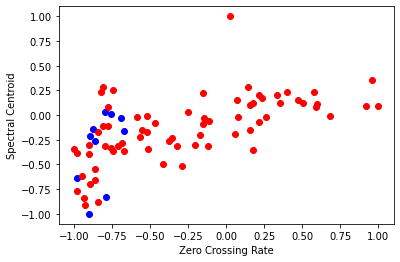

In [ ]:
plt.scatter(training_features[:10,0], training_features[:10,1], c='b')
plt.scatter(training_features[10:,0], training_features[10:,1], c='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

¿Seremos capaces de "separar" estos datos a través de alguna técnica?